### ライブラリのインポート

In [29]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os
import math
import re
import matplotlib.pyplot as plt
# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

### 表示に必要な関数を定義

In [1]:
# 分を24時間表示に変換
def calculate_time(minutes):
    # 9:00 を0分、20:00 を660分として計算
    start_time = 9 * 60  # 9:00を分単位に変換
    end_time = 20 * 60  # 20:00を分単位に変換
    
    total_minutes = start_time + minutes
    
    # 時間と分に変換
    hours = total_minutes // 60
    mins = total_minutes % 60
    
    # 24時間表記に変換
    if hours >= 24:
        hours -= 24
    
    # 時間と分を文字列に変換して返す
    return f"{hours:02d}:{mins:02d}"

In [2]:
# 24時間表示を分に変換
def calculate_minutes(time_str):
    # 時刻を時間と分に分割
    hours, mins = map(int, time_str.split(":"))
    
    # 9:00 を0分、20:00 を660分として計算
    start_time = 9 * 60  # 9:00を分単位に変換
    end_time = 20 * 60  # 20:00を分単位に変換
    
    # 入力された時刻を分単位に変換
    total_minutes = hours * 60 + mins
    
    # 24時間以上の場合は調整
    if total_minutes < start_time:
        total_minutes += 24 * 60
    
    # 開始時刻からの経過時間を計算
    elapsed_minutes = total_minutes - start_time
    
    return elapsed_minutes

In [3]:
def not_in_new_ride(a, b):
    ans=a
    # リストaからリストbに含まれている要素を取り除く
    for item in b:
        if item in a:
            ans.remove(item)
    return ans

In [17]:
def ride_printer(date, total_popularity, total_time, ride_lst, new_ride_lst, ride_time):
    print("-" * 40)
    print(f"~ {date} のデータによる乗車プラン ~")
    print("乗車時間　：　アトラクション名")
    for i in range(len(new_ride_lst)):
        print(f"{calculate_time(ride_time[i])}　： {attractions.get(new_ride_lst[i])}")
    print('トータル所要時間：',total_time)
    print('トータル満足度　：',total_popularity)
    print("-" * 40)
    if not(len(ride_lst)==len(new_ride_lst)):
        print("※全てのアトラクションを乗ることができません")
        print("プランから除外されたアトラクション")
        not_ride = not_in_new_ride(ride_lst, new_ride_lst)
        for i in not_ride:
            print(f"{i}　： {attractions.get(i)}")

### 最適化プランCSVファイルの読み込み

In [31]:
# CSVファイルを読み込む
df = pd.read_csv("best_results_5days_r5_t1000.csv")
# 日付をインデックスに設定
df.set_index("日付", inplace=True)
display(df.head())
attractions = {
    0: 'ソアリン',
    1: 'トイストーリーマニア',
    2: 'タワーオブテラー',
    3: 'センターオブジアース',
    4: 'インディージョーンズ',
    5: 'レイジングスピリッツ',
    6: 'マジックランプシアター',
    7: 'タートルトーク'
}

,トータル満足度,トータル所要時間,予定プラン,最適プラン,タイムスケジュール
日付,,,,,
2022-07-01,865,651,"[0, 0, 0, 1, 3, 2, 4, 5, 4, 2, 1, 3, 1, 0, 5]","[0, 0, 0, 1, 3, 2, 4, 5, 4, 2, 1, 3, 1, 0, 5]","[0, 120, 195, 240, 315, 345, 405, 420, 435, 45..."
2022-07-01,935,659,"[0, 1, 0, 2, 0, 3, 4, 4, 5, 0, 1, 1, 1, 3, 0]","[0, 1, 0, 2, 0, 3, 4, 4, 5, 0, 1, 1, 1, 3, 0]","[0, 120, 180, 240, 300, 360, 390, 405, 435, 45..."
2022-07-01,925,617,"[2, 2, 0, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 5, 1]","[2, 2, 0, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 5, 1]","[0, 75, 120, 195, 270, 345, 420, 435, 495, 510..."
2022-07-01,948,640,"[0, 0, 4, 0, 1, 0, 0, 3, 0, 1, 1, 1, 3, 3]","[0, 0, 4, 0, 1, 0, 0, 3, 0, 1, 1, 1, 3, 3]","[0, 120, 195, 210, 270, 330, 405, 465, 480, 55..."
2022-07-01,937,624,"[0, 0, 1, 3, 4, 0, 4, 0, 0, 1, 4, 1, 1, 5, 1]","[0, 0, 1, 3, 4, 0, 4, 0, 0, 1, 4, 1, 1, 5, 1]","[0, 120, 195, 255, 285, 315, 375, 390, 450, 51..."


### 乗車プランのグラフによる可視化

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_time_schedule(csv_file, num_samples=10):
    # CSVファイルからデータを読み込む
    df = pd.read_csv(csv_file)

    # 最初の num_samples 個のデータのみを抽出
    df_sample = df.head(num_samples)

    # "最適プラン"　と　"タイムスケジュール" colのデータを取得
    optimal_plans_list = [eval(plan) for plan in df_sample["最適プラン"]]
    time_schedule_list = [eval(plan) for plan in df_sample["タイムスケジュール"]]

    # カラーマップを定義
    num_colors = len(optimal_plans_list)
    colors = plt.cm.get_cmap('tab10', num_colors)

    # プロットの準備
    plt.figure(figsize=(18, 10))  # グラフのサイズを広く設定

    # optimal_plans_list と time_schedule_list のデータをプロット
    for i in range(len(optimal_plans_list)):
        plt.plot(time_schedule_list[i], optimal_plans_list[i], marker='o', linestyle='-', 
                 label=f'Data {i+1}', color=colors(i))

    # グラフの設定
    plt.xlabel('時間軸', fontsize=14)
    plt.ylabel('アトラクションインデックス', fontsize=14)
    plt.title(f'最適プランのタイムスケジュール ({num_samples} samples)', fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)

    # x軸の範囲を調整（必要に応じて）
    plt.xlim(0, 705)  # 例として幅を広く設定

    # y軸の範囲を調整（必要に応じて）
    plt.ylim(0, 7)
    plt.yticks(range(8), [attractions[i] for i in range(8)], fontsize=10)

    # x軸にアトラクションの名称を設定
    x_ticks = range(0, 706, 15)
    x_labels = [f'{calculate_time(tick)}' for tick in x_ticks]
    plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)
    
    # グラフの表示
    plt.tight_layout()
    plt.show()

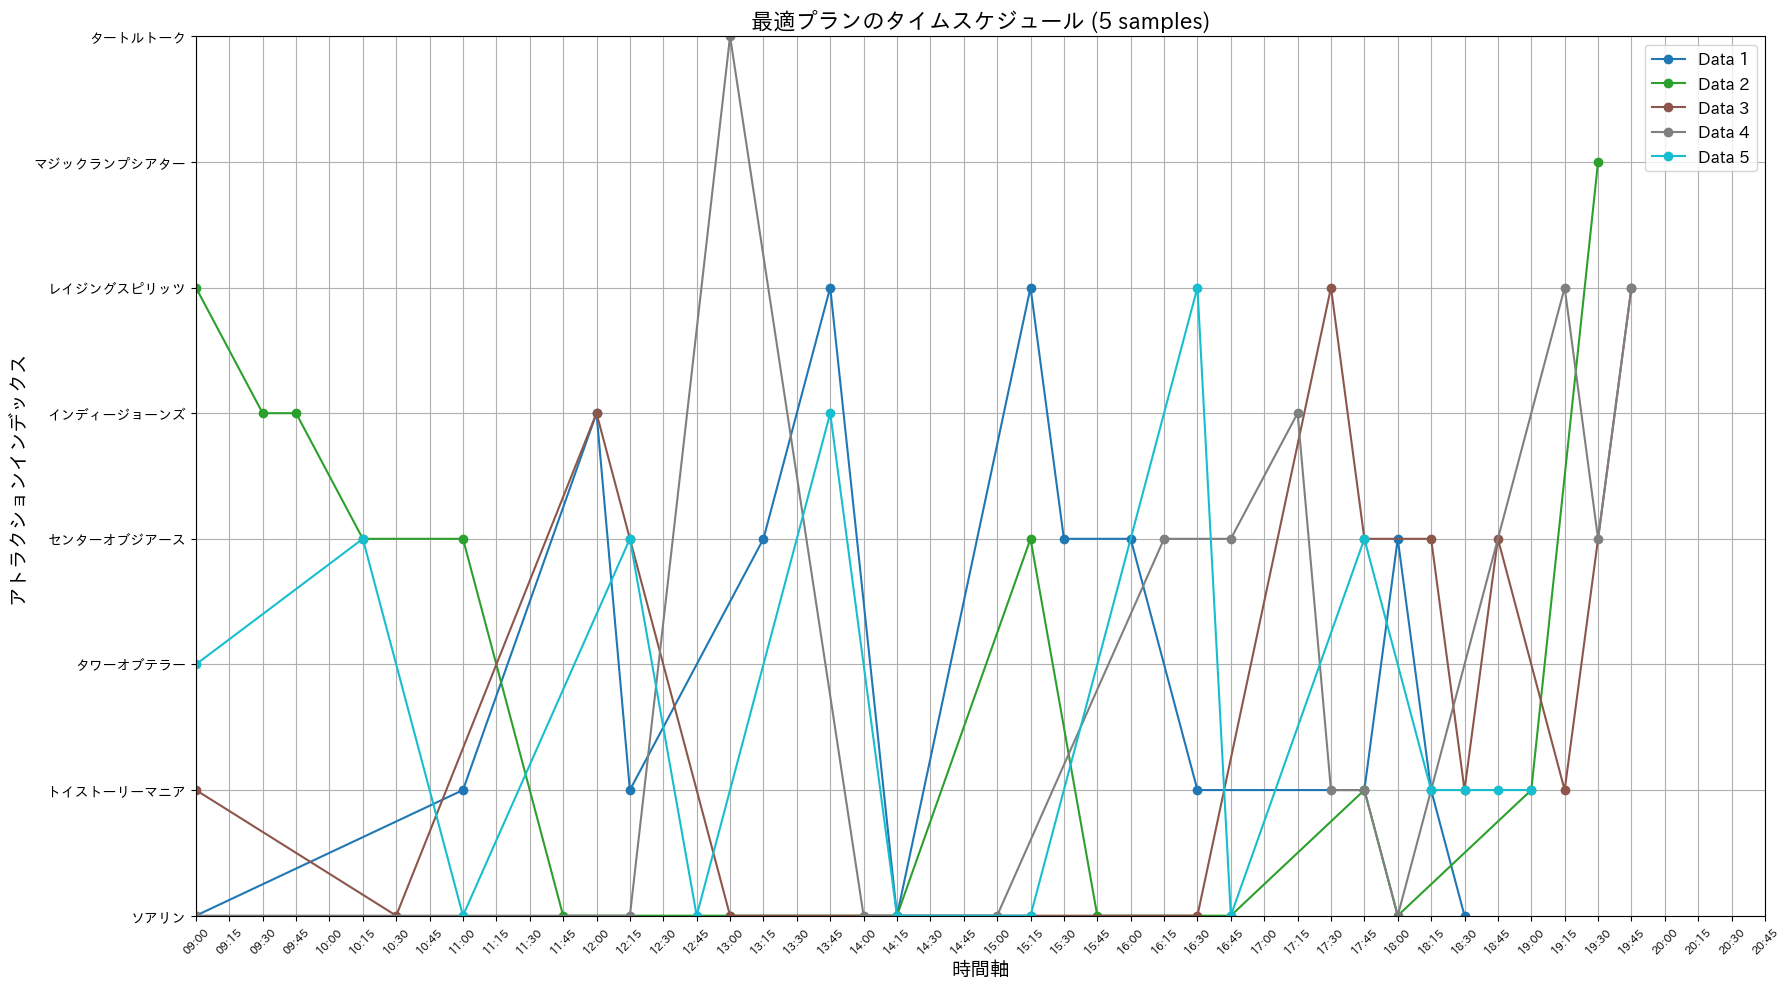

In [53]:
# 関数の呼び出し
csv_file = "best_result_csv/best_results_1days_r50_t1000.csv"  # 適切なファイルパスに変更する
plot_time_schedule(csv_file, num_samples=5)

### 各最適プランの類似度をヒートマップに表示

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def plot_heatmap(csv_file, num_samples=10):
    # CSVファイルを読み込む
    df = pd.read_csv(csv_file)

    # 最初の num_samples 個のデータのみを抽出
    df_sample = df.head(num_samples)

    # "最適プラン" colのデータを取得
    optimal_plans = df_sample["最適プラン"]

    # 各行の "最適プラン" をリストとして展開
    optimal_plans_list = [eval(plan) for plan in optimal_plans]

    # 最大長を取得
    max_length = max(len(plan) for plan in optimal_plans_list)

    # リストの長さを揃える（短いリストは8で埋める）
    padded_plans = [plan + [8] * (max_length - len(plan)) for plan in optimal_plans_list]

    # コサイン類似度を計算
    similarity_matrix = cosine_similarity(padded_plans)

    # ヒートマップをプロット
    plt.figure(figsize=(45, 36))  # グラフのサイズを適宜調整
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm',
                xticklabels=[f'Plan {i+1}' for i in range(num_samples)],
                yticklabels=[f'Plan {i+1}' for i in range(num_samples)])

    plt.title(f'Similarity Heatmap of Optimal Plans ({num_samples} samples)')
    plt.show()

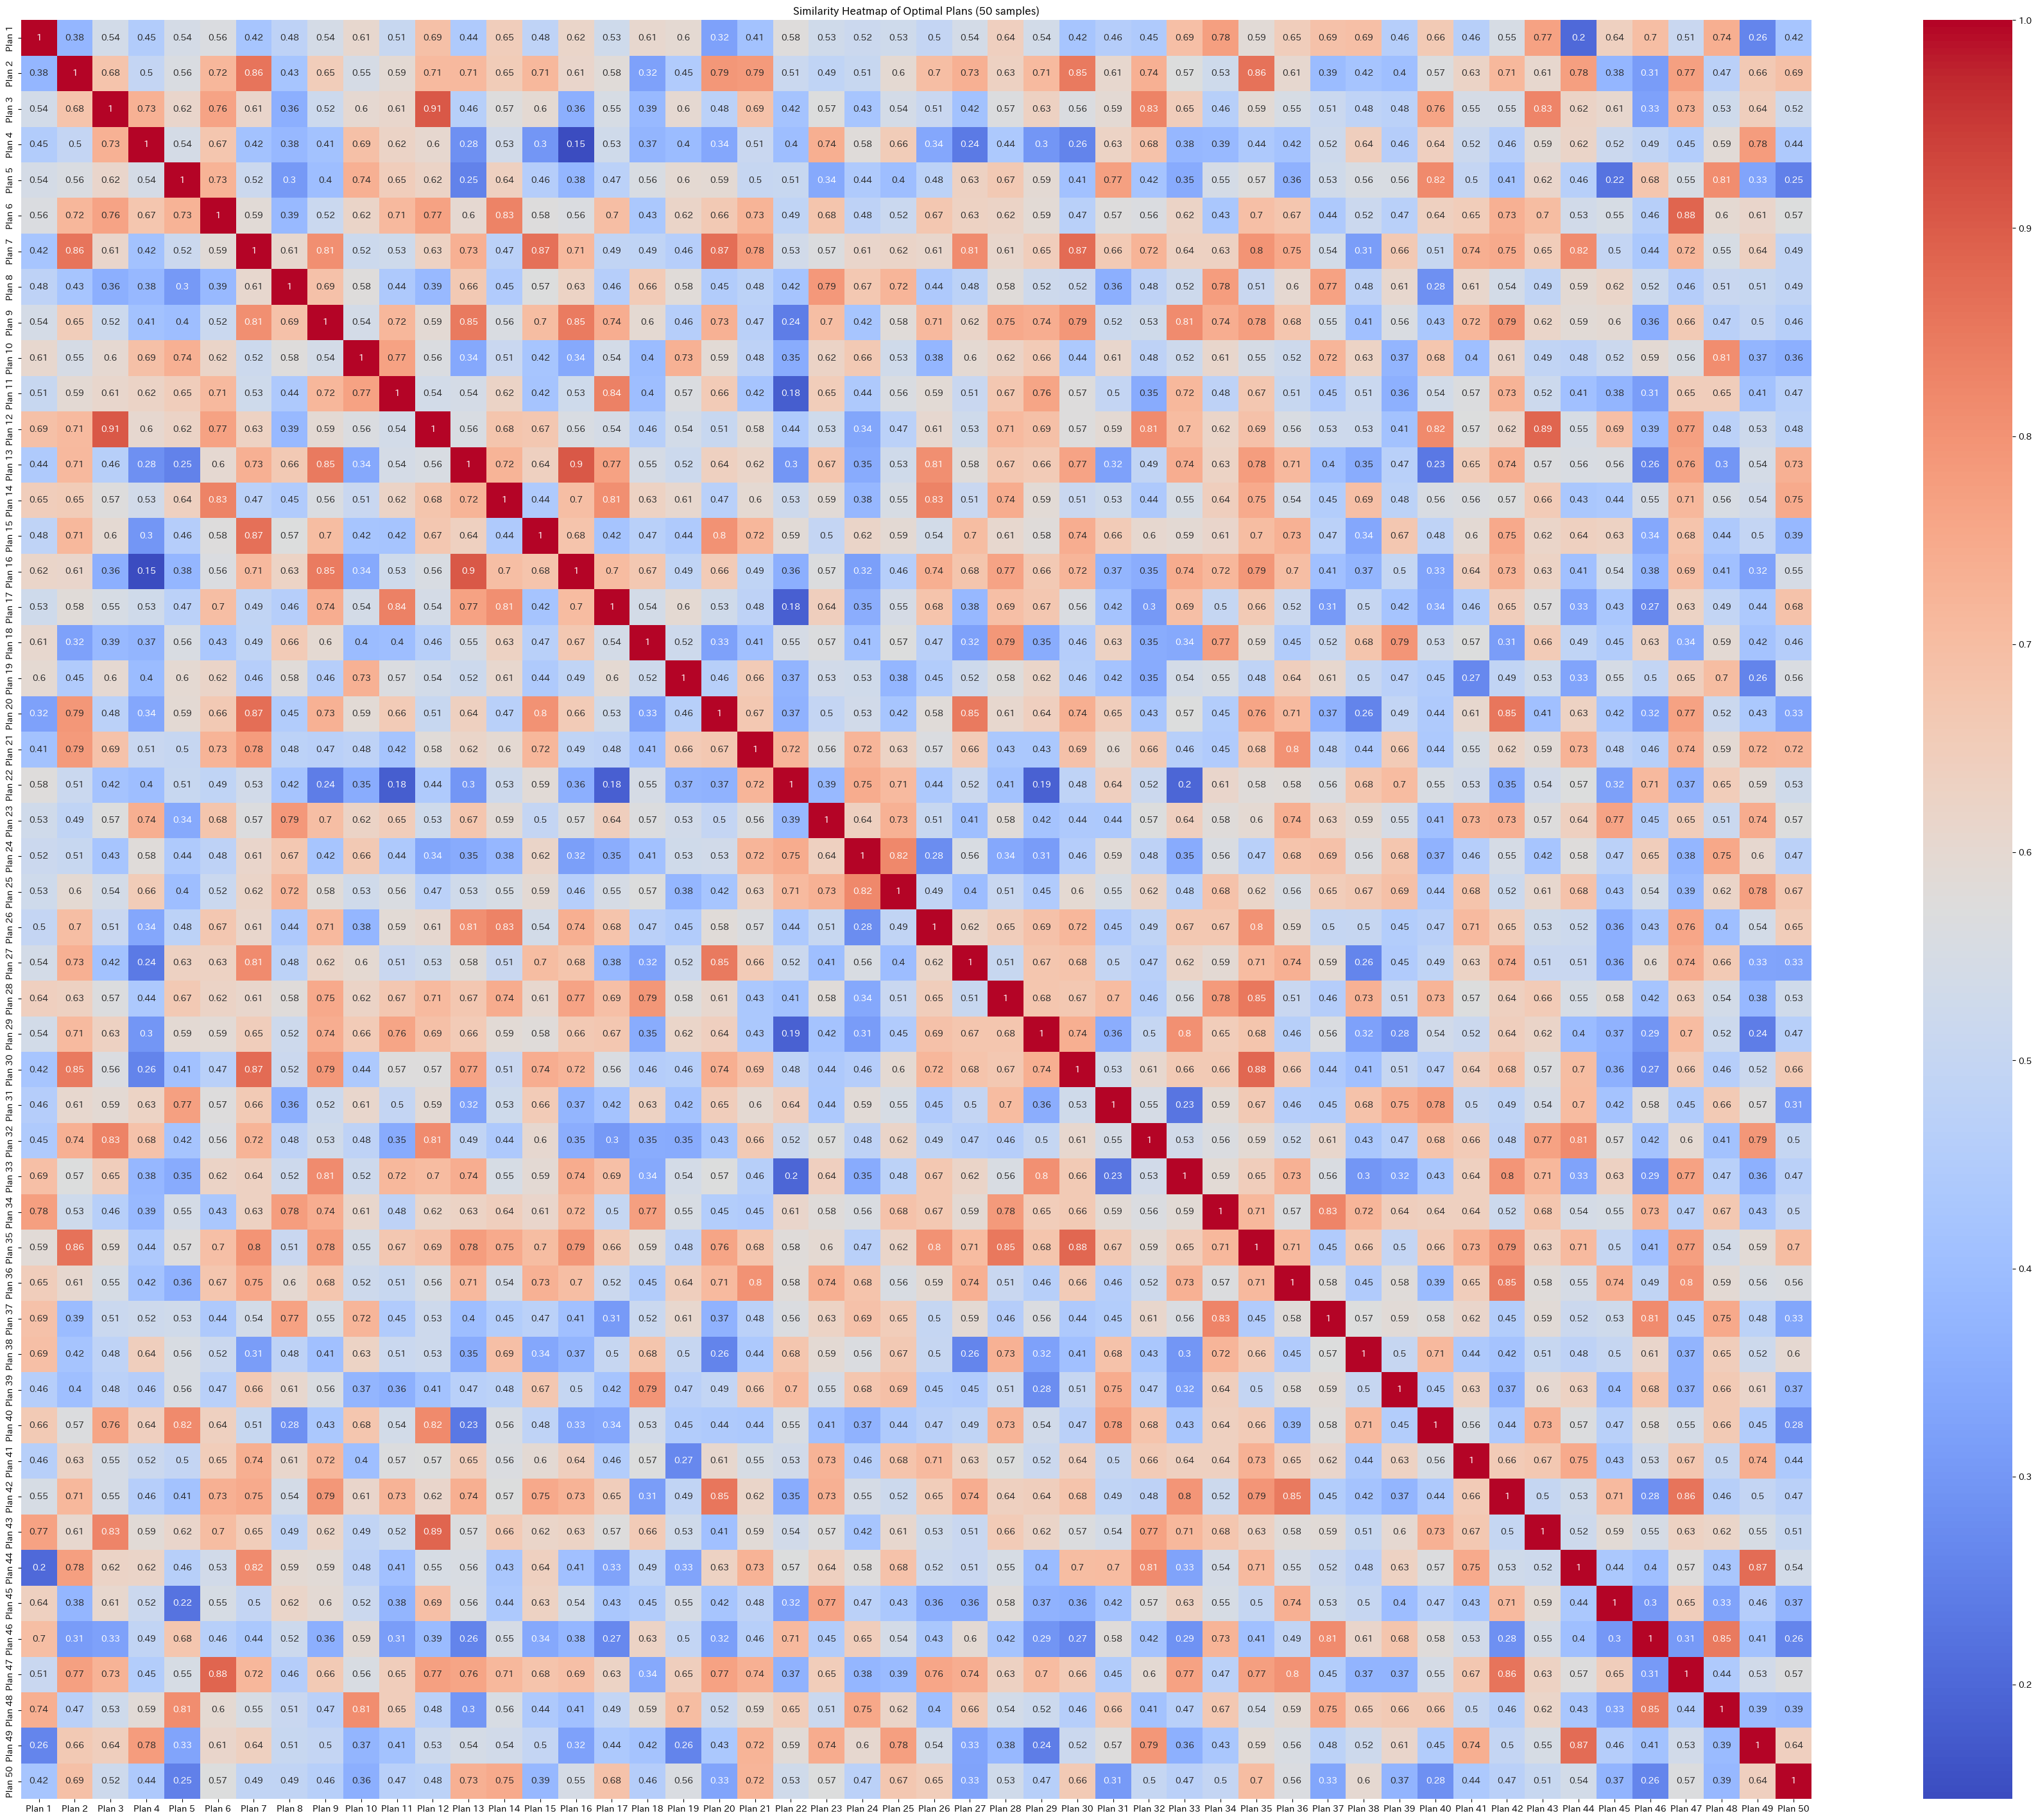

In [38]:
# 関数の呼び出し
csv_file = "best_result_csv/best_results_1days_r50_t1000.csv"  # 適切なファイルパスに変更する
plot_heatmap(csv_file, num_samples=50)

### 最適化されたプランの中で類似度が高いプランをそれぞれ表示

In [27]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import ast

def find_similar_pairs(csv_file, num_samples=10, similarity_threshold=0.9):
    # CSVファイルを読み込む
    df = pd.read_csv(csv_file)

    # 最初の num_samples 個のデータのみを抽出
    df_sample = df.head(num_samples)

    # "最適プラン" colのデータを取得
    optimal_plans = df_sample["最適プラン"]

    # 各行の "最適プラン" をリストとして展開
    optimal_plans_list = [ast.literal_eval(plan) for plan in optimal_plans]

    # 最大長を取得
    max_length = max(len(plan) for plan in optimal_plans_list)

    # リストの長さを揃える（短いリストは0で埋める）
    padded_plans = [plan + [0] * (max_length - len(plan)) for plan in optimal_plans_list]

    # コサイン類似度を計算
    similarity_matrix = cosine_similarity(padded_plans)

    # 類似度の閾値を超えるペアを抽出
    similar_pairs = []
    for i in range(num_samples):
        for j in range(i + 1, num_samples):
            if similarity_matrix[i, j] >= similarity_threshold:
                similar_pairs.append((i+1, j+1, similarity_matrix[i, j]))  # +1 はインデックスを1から始めるため

    # 類似しているペアとその類似度を出力
    if len(similar_pairs) > 0:
        print(f"Similar pairs with similarity >= {similarity_threshold}:")
        for pair in similar_pairs:
            data1 = df_sample.iloc[pair[0] - 1]  # データは1から始まるので、インデックス調整が必要
            data2 = df_sample.iloc[pair[1] - 1]
            print(f"Data {pair[0]} and Data {pair[1]} with similarity: {pair[2]:.2f}")
            
            # 各要素を取得1
            data1 = [data1[0]] + [ast.literal_eval(item) if isinstance(item, str) else item for item in data1[1:]]
            date1 = data1[0]
            total_popularity1 = data1[1]
            total_time1 = data1[2]
            ride_lst1 = data1[3]
            new_ride_lst1 = data1[4]
            ride_time1 = data1[5]
            
            # 各要素を取得2
            data2 = [data2[0]] + [ast.literal_eval(item) if isinstance(item, str) else item for item in data2[1:]]
            date2 = data2[0]
            total_popularity2 = data2[1]
            total_time2 = data2[2]
            ride_lst2 = data2[3]
            new_ride_lst2 = data2[4]
            ride_time2 = data2[5]
            
            # ride_printerで表示
            ride_printer(date1, total_popularity1, total_time1, ride_lst1, new_ride_lst1, ride_time1)
            ride_printer(date2, total_popularity2, total_time2, ride_lst2, new_ride_lst2, ride_time2)
            print()
    else:
        print("No similar pairs found with the given similarity threshold.")

In [37]:
# 関数の呼び出し
csv_file = "best_result_csv/best_results_1days_r50_t1000.csv"  # 適切なファイルパスに変更する
find_similar_pairs(csv_file, num_samples=50, similarity_threshold=0.9)

Similar pairs with similarity >= 0.9:
Data 3 and Data 12 with similarity: 0.91
----------------------------------------
~ 2022-07-01 のデータによる乗車プラン ~
乗車時間　：　アトラクション名
180
09:00　： トイストーリーマニア
10:30　： ソアリン
12:00　： インディージョーンズ
12:15　： センターオブジアース
13:00　： ソアリン
14:15　： ソアリン
15:15　： ソアリン
16:30　： ソアリン
17:30　： レイジングスピリッツ
17:45　： センターオブジアース
18:15　： センターオブジアース
18:30　： トイストーリーマニア
18:45　： センターオブジアース
19:15　： トイストーリーマニア
19:45　： レイジングスピリッツ
トータル所要時間： 650
トータル満足度　： 896
----------------------------------------
----------------------------------------
~ 2022-07-01 のデータによる乗車プラン ~
乗車時間　：　アトラクション名
180
09:00　： トイストーリーマニア
10:30　： ソアリン
12:00　： レイジングスピリッツ
12:30　： センターオブジアース
13:00　： トイストーリーマニア
14:15　： タワーオブテラー
15:00　： ソアリン
16:15　： ソアリン
17:30　： インディージョーンズ
17:45　： センターオブジアース
18:15　： トイストーリーマニア
18:30　： トイストーリーマニア
18:45　： トイストーリーマニア
19:00　： トイストーリーマニア
19:15　： センターオブジアース
トータル所要時間： 633
トータル満足度　： 917
----------------------------------------

Data 13 and Data 16 with similarity: 0.90
----------------------------------------
~